## Import libraries and insert data to notebook using IBM's built-in API

In [4]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_703c7f006edb4817ab7f6e5bfc3a75d5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hQOGmsulpZKKScyEmPzOymEf-A8OHfnXRcyc5zM67BDc',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_703c7f006edb4817ab7f6e5bfc3a75d5.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-3uumydav887rgt',Key='DOHMH_New_York_City_Restaurant_Inspection_Results.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

## Find more popular type of restaurant in New York City

Find total # of each restaurant type in NYC and sort in order of largest to smallest quantity

Text(0, 0.5, 'cuisine type')

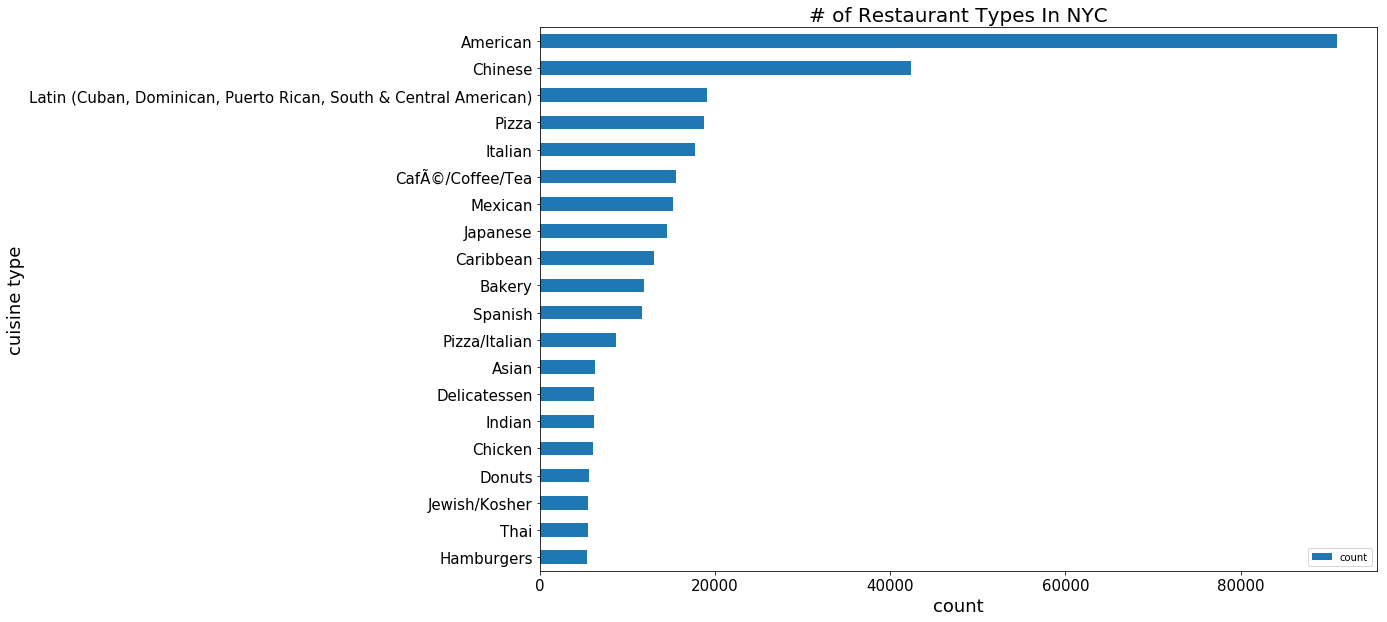

In [22]:
cuisine = df[['CUISINE DESCRIPTION','CAMIS']].groupby(['CUISINE DESCRIPTION']).count().reset_index()
cuisine = cuisine.rename(columns={"CUISINE DESCRIPTION":"cuisine type","CAMIS":"count"}).sort_values(by=['count'])
cuisine.tail(20).plot.barh(x="cuisine type", y="count", fontsize=15,figsize=(15,10))
plt.title('# of Restaurant Types In NYC', fontsize=20)
plt.xlabel('count', fontsize=18)
plt.ylabel('cuisine type', fontsize=18)

Text(0, 0.5, 'Borough')

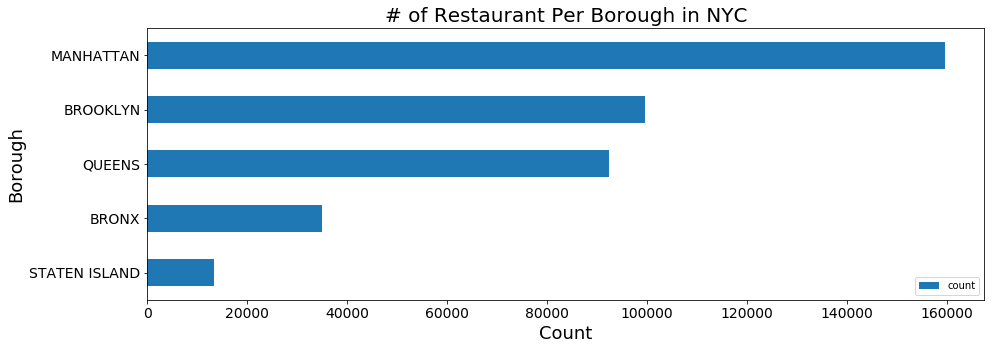

In [28]:
loc = df[['BORO','CAMIS']].groupby(['BORO']).count().drop(index=['Missing']).reset_index()
loc = loc.rename(columns={"BORO":"location","CAMIS":"count"}).sort_values(by=['count'])
loc.plot.barh(x="location", y="count", title="Restaurant Count In NYC",fontsize=14,figsize=(15,5))
plt.title('# of Restaurant Per Borough in NYC', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Borough', fontsize=18)

## Find out restaurant spread at New York City

In [74]:
file = client_703c7f006edb4817ab7f6e5bfc3a75d5.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-3uumydav887rgt',Key='nyc_zip_code_tabulation_areas_polygons.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(file, "__iter__"): file.__iter__ = types.MethodType( __iter__, file )
nyc_df = pd.read_csv(file)

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
nyc_geo = client_703c7f006edb4817ab7f6e5bfc3a75d5.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-3uumydav887rgt', Key='nyc_zip_code_tabulation_areas_polygons.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(nyc_geo, "__iter__"): nyc_geo.__iter__ = types.MethodType( __iter__, nyc_geo )

zipcode = df[['BORO','ZIPCODE','CAMIS']].groupby(['BORO','ZIPCODE']).count().reset_index()
zipcode = zipcode.rename(columns={"BORO":"borough","ZIPCODE":"postalcode","CAMIS":"count"})
zipcode['postalcode'] = zipcode.postalcode.astype(int)
zipcode['borough'] = zipcode['borough'].str.lower()
ziplist = nyc_df[['borough','postalcode']]
ziplist['count'] = nyc_df['st_fips'].subtract(36)
ziplist['borough'] = ziplist['borough'].str.lower()
zipmerge = pd.concat([zipcode, ziplist]).groupby(['borough','postalcode']).sum().reset_index().sort_values(by=['count'],ascending=False)
zipmerge.head(20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,borough,postalcode,count
73,manhattan,10003,11105
87,manhattan,10019,9805
104,manhattan,10036,9178
82,manhattan,10013,9019
72,manhattan,10002,7690
90,manhattan,10022,7240
71,manhattan,10001,7154
84,manhattan,10016,7094
80,manhattan,10011,7009
211,queens,11372,6540


## Find out average score for different area 

Text(0, 0.5, 'Borough')

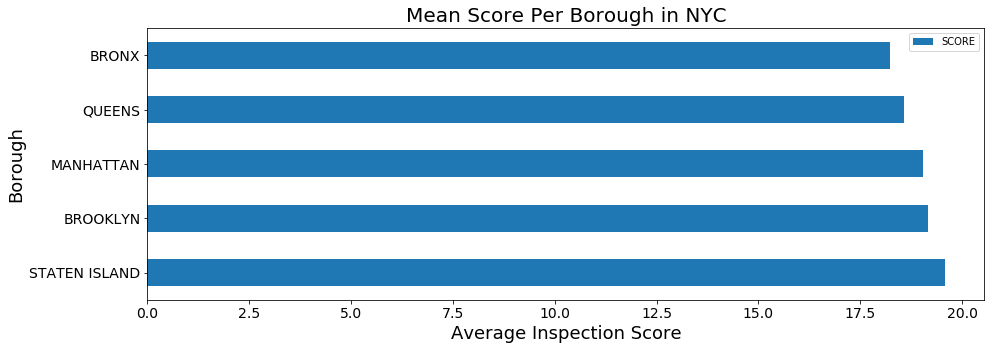

In [27]:
score = df[['BORO','SCORE']].dropna()
score_avg = score.groupby(['BORO']).mean().reset_index().sort_values(by=['SCORE'],ascending=False)
score_avg.plot.barh(x="BORO", y="SCORE", title="Restaurant Count In NYC",fontsize=14,figsize=(15,5))
plt.title('Mean Score Per Borough in NYC', fontsize=20)
plt.xlabel('Average Inspection Score', fontsize=18)
plt.ylabel('Borough', fontsize=18)

## Plot average score of top 20 restaurant

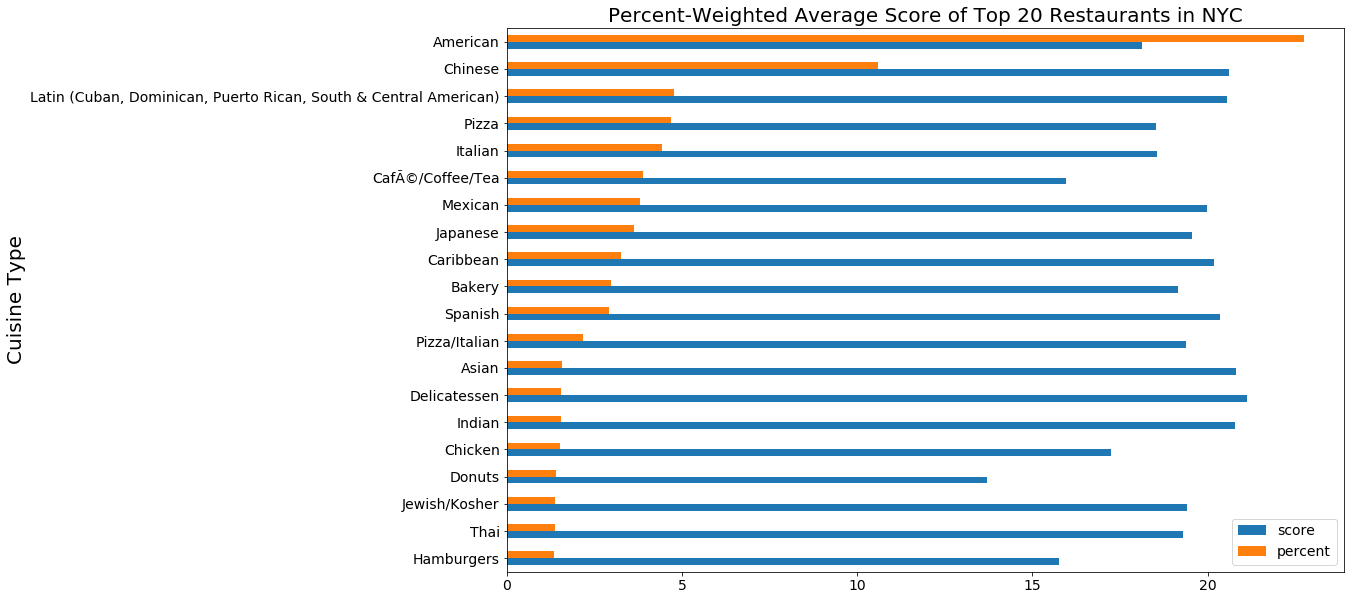

In [31]:
# Find avg score grouped by type
type_score = df[['CUISINE DESCRIPTION','SCORE']].dropna().rename(columns={"CUISINE DESCRIPTION":"cuisine type","SCORE":"score"})
type_score = type_score.groupby(['cuisine type']).mean()
# Find % of total restaurants grouped by type 
cuisine_cnt = df[['CUISINE DESCRIPTION','CAMIS']].rename(columns={"CUISINE DESCRIPTION":"cuisine type","CAMIS":"percent"}).groupby(['cuisine type']).count()
cuisine_cnt = cuisine_cnt / cuisine_cnt.sum() * 100
# Merge Avg and % Together, then order by top 20 restaurant types
cuisine_avg = pd.merge(left=type_score, right=cuisine_cnt, how='right', left_on='cuisine type', right_on='cuisine type')
cuisine_avg = cuisine_avg.sort_values(by=['percent'],ascending=False)
cuisine_20 = cuisine_avg.head(20).sort_values(by=['percent'])
# View in horizontal bar plot
cuisine_20.plot.barh(title="Avg Score of Top 20 Restaurant Types In NYC",fontsize=14,figsize=(15,10))
plt.title('Percent-Weighted Average Score of Top 20 Restaurants in NYC', fontsize=20)
plt.ylabel('Cuisine Type', fontsize=20)
plt.legend(fontsize=14)

## Find relationship between percent and score

Text(0.5, 0, 'Percent')

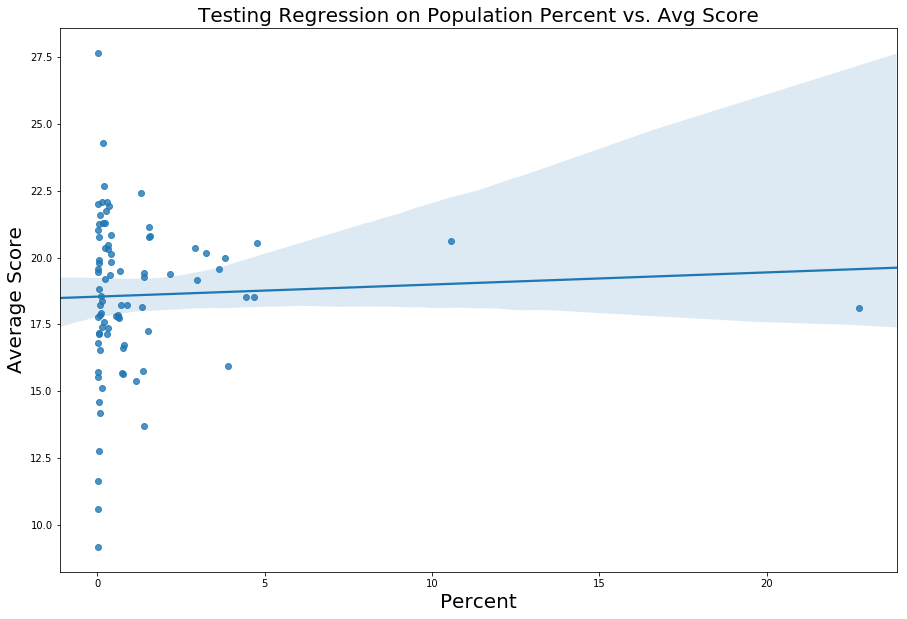

In [57]:
plt.figure(figsize=(15,10))
sns.regplot(x="percent", y="score", data=cuisine_avg)
plt.title('Testing Regression on Population Percent vs. Avg Score', fontsize=20)
plt.ylabel('Average Score', fontsize=20)
plt.xlabel('Percent', fontsize=20)


## Plot box graph for different type of restaurants


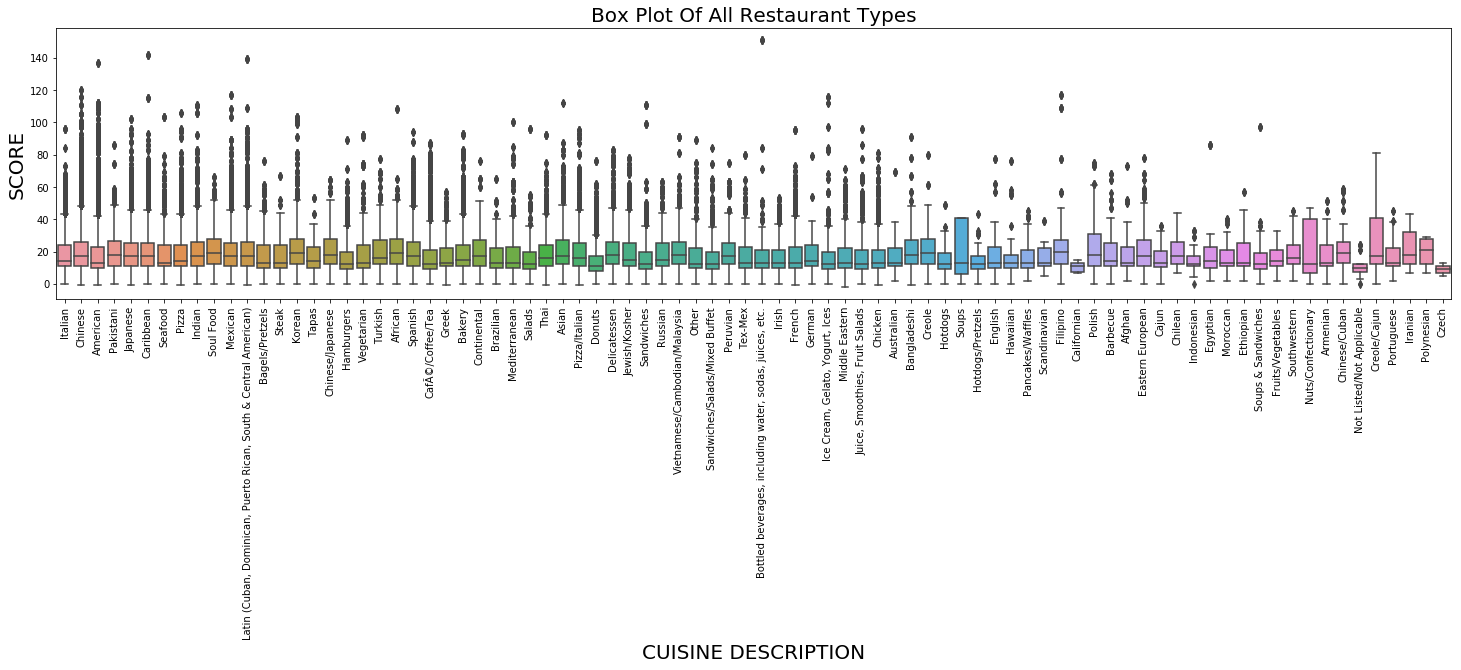

In [40]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title('Box Plot Of All Restaurant Types', fontsize=20)
plt.ylabel('Inspection Score', fontsize=20)
plt.xlabel('Cuisine Description', fontsize=20)
sns.boxplot(x="CUISINE DESCRIPTION", y="SCORE", data=df)

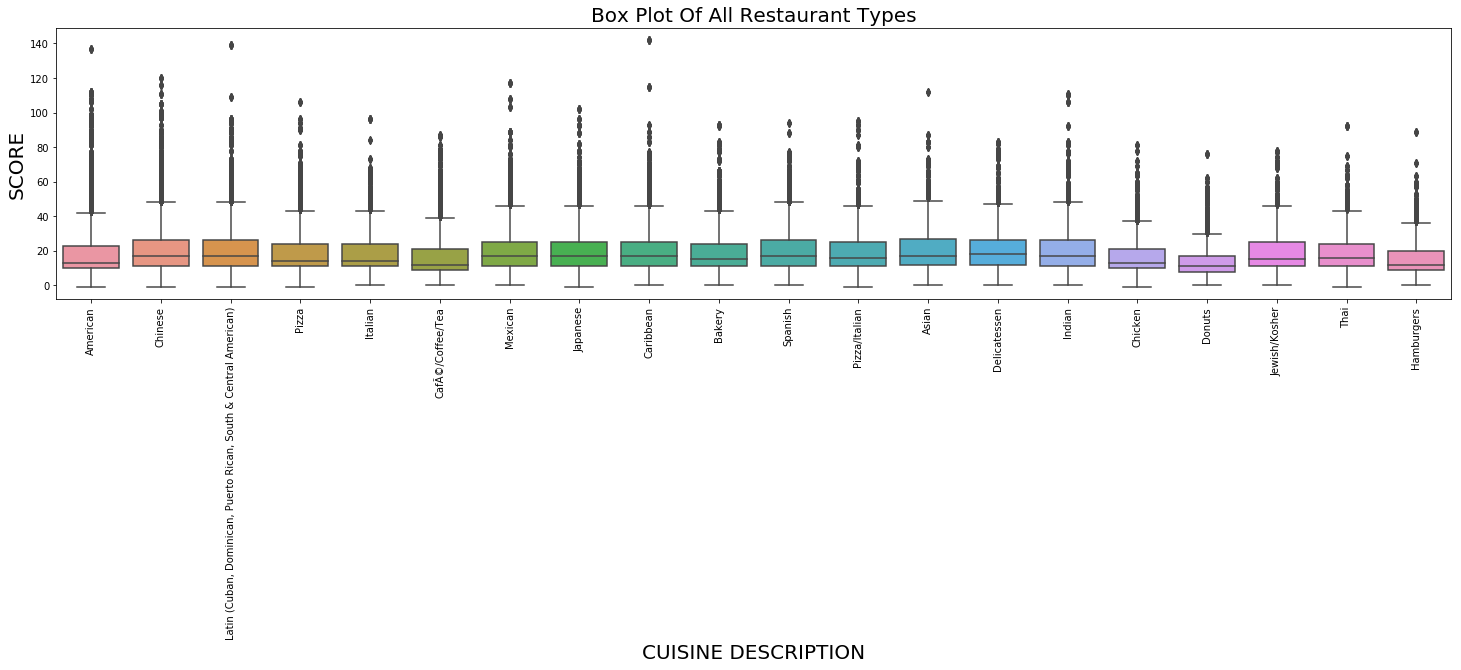

In [53]:
top20 = pd.merge(left=df, right=cuisine.tail(20), how='inner', left_on='CUISINE DESCRIPTION', right_on='cuisine type')
top20 = top20.sort_values(by=['count'],ascending=False)
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title('Box Plot Of All Restaurant Types', fontsize=20)
plt.ylabel('Inspection Score', fontsize=20)
plt.xlabel('Cuisine Description', fontsize=20)
sns.boxplot(x="CUISINE DESCRIPTION", y="SCORE", data=top20)

Data visualization and analysis
mean of different restaurants score
average of different area score
compare top 20 restaurant percentage and score
vertically compare each type of restaurants score
trend and relation between different restaurants and score